# Bird Classification Project
---

## Load and Explore Data

In [9]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from PIL import Image


In [10]:
# Explore folder

data_dir = '/Users/gurvi/Desktop/Data Science/M3P4-Pretrained_Models-main/bird'

os.listdir(data_dir)

['images to predict', 'test', 'train', 'valid']

In [11]:
test_dir = '/Users/gurvi/Desktop/Data Science/M3P4-Pretrained_Models-main/bird/test'
train_dir = '/Users/gurvi/Desktop/Data Science/M3P4-Pretrained_Models-main/bird/train'
valid_dir = '/Users/gurvi/Desktop/Data Science/M3P4-Pretrained_Models-main/bird/valid'
predict_dir = '/Users/gurvi/Desktop/Data Science/M3P4-Pretrained_Models-main/bird/images to predict'

In [12]:
os.listdir(train_dir)

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL']

In [13]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from tensorflow.keras import models

In [14]:
#How many images are there total?
def count_images_in_folder(folder_path):
    # Image file extensions to consider
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff', '.webp')
    total_images = 0
    
    # Traverse through the main folder and its subfolders
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(image_extensions):
                total_images += 1
                
    return total_images


folder_path = '/Users/gurvi/Desktop/Data Science/M3P4-Pretrained_Models-main/bird'
print(f"Total images: {count_images_in_folder(folder_path)}")

Total images: 3414


### Average dimension of images in each folder

In [16]:
from PIL import Image

from PIL import Image
import os

def calculate_average_dimensions(folder):
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff', '.webp')
    total_width = 0
    total_height = 0
    image_count = 0

    for root, _, files in os.walk(folder):
        for file in files:
            if file.lower().endswith(image_extensions):
                image_count += 1
                with Image.open(os.path.join(root, file)) as img:
                    width, height = img.size
                    total_width += width
                    total_height += height
                    
    if image_count == 0:
        return (0, 0, 0)  # Handle the case with no images

    avg_width = total_width / image_count
    avg_height = total_height / image_count
    
    return (avg_width, avg_height, image_count)



       


In [17]:
average_dimensions = calculate_average_dimensions(valid_dir )
average_dimensions 
print(f"Average image dimensioin and total images in valid folder : {average_dimensions}")


Average image dimensioin and total images in valid folder : (224.0, 224.0, 100)


In [18]:
average_dimensions = calculate_average_dimensions(train_dir )
average_dimensions 
print(f"Average image dimensioin and total images in train folder : {average_dimensions}")


Average image dimensioin and total images in train folder : (224.0, 224.0, 3208)


In [19]:
average_dimensions = calculate_average_dimensions(test_dir )
average_dimensions 
print(f"Average image dimensioin and total images in test folder : {average_dimensions}")


Average image dimensioin and total images in test folder : (224.0, 224.0, 100)


In [20]:
average_dimensions = calculate_average_dimensions(predict_dir )
average_dimensions 
print(f"Average image dimensioin and total iamges in predict folder : {average_dimensions}")


Average image dimensioin and total iamges in predict folder : (224.0, 224.0, 6)


### Average dimension for each folder  is (224, 224), hence new input size would be (224, 224)

In [22]:
# Load VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False)

In [23]:
# Specify new input shape for images and update base_model

new_input = keras.Input(shape=(224, 224, 3))
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=new_input)
base_model.trainable = False

In [24]:
flatten_layer = Flatten()
prediction_layer = Dense(20, activation='softmax')

In [25]:
model = models.Sequential([
    base_model,
    flatten_layer,
    prediction_layer
])

In [26]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │         501,780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,216,468 (58.05 MB)

 Trainable params: 501,780 (1.91 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./224,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

train_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3208 images belonging to 20 classes.


In [29]:
test_datagen = ImageDataGenerator(rescale = 1./224)
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 100 images belonging to 20 classes.


In [30]:
val_datagen = ImageDataGenerator(rescale = 1./224)
val_set = val_datagen.flow_from_directory(valid_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 100 images belonging to 20 classes.


In [31]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history = model.fit(train_set, epochs=5, validation_data=test_set, callbacks=[early_stop])

C:\Users\gurvi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


C:\Users\gurvi\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_19']. Received: the structure of inputs=*
  warnings.warn(


101/101 ━━━━━━━━━━━━━━━━━━━━ 891s 9s/step - accuracy: 0.4121 - loss: 2.5120 - val_accuracy: 0.8600 - val_loss: 0.4374
Epoch 2/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 1518s 15s/step - accuracy: 0.8702 - loss: 0.4498 - val_accuracy: 0.8600 - val_loss: 0.3047
Epoch 3/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 1288s 13s/step - accuracy: 0.9037 - loss: 0.3039 - val_accuracy: 0.9400 - val_loss: 0.1940
Epoch 4/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 1311s 13s/step - accuracy: 0.9353 - loss: 0.1952 - val_accuracy: 0.9200 - val_loss: 0.2653
Epoch 5/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 1291s 13s/step - accuracy: 0.9606 - loss: 0.1350 - val_accuracy: 0.9200 - val_loss: 0.2192


In [32]:
model.save('model.h5')

In [33]:
from keras.models import load_model
loaded_model = load_model('model.h5', compile=False)

In [34]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.593828,1.532587,0.86,0.437384
1,0.867519,0.439662,0.86,0.304671
2,0.911160,0.280310,0.94,0.193954
3,0.937344,0.200674,0.92,0.265253
4,0.964464,0.128095,0.92,0.219240


<Axes: >

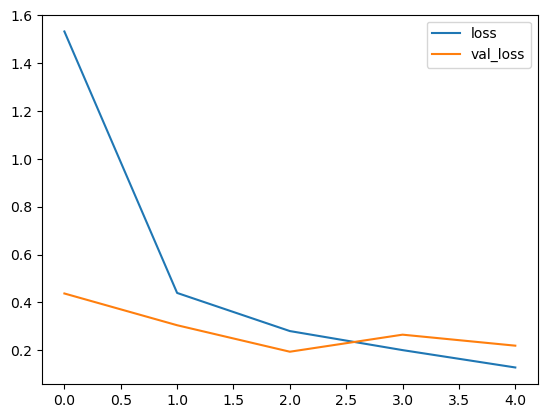

In [35]:
metrics[['loss','val_loss']].plot()

<Axes: >

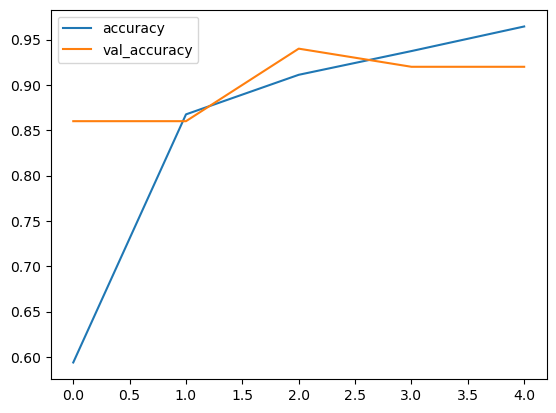

In [36]:
metrics[['accuracy','val_accuracy']].plot()

In [37]:
score = model.evaluate(val_set, verbose=1)
print("validation loss:", score[0])
print("validation accuracy:", score[1])

C:\Users\gurvi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 9s/step - accuracy: 0.9293 - loss: 0.2229
validation loss: 0.22011061012744904
validation accuracy: 0.9300000071525574


In [38]:
# List of image file extensions to load
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']

# List to store the loaded images
def images_array(folder):
    images = []
    # Load the images from the directory
    for filename in os.listdir(folder):
    # Check if the file is an image
        if any(extension in filename.lower() for extension in image_extensions):
        # Load the image
            img = imread(os.path.join(folder, filename))
        
        # Add the image to the list
            images.append(img)

    # Convert the list of images to a NumPy array
    return np.array(images)

In [39]:
pred_images_array=images_array(predict_dir)

In [40]:
val_images_array=images_array(valid_dir)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


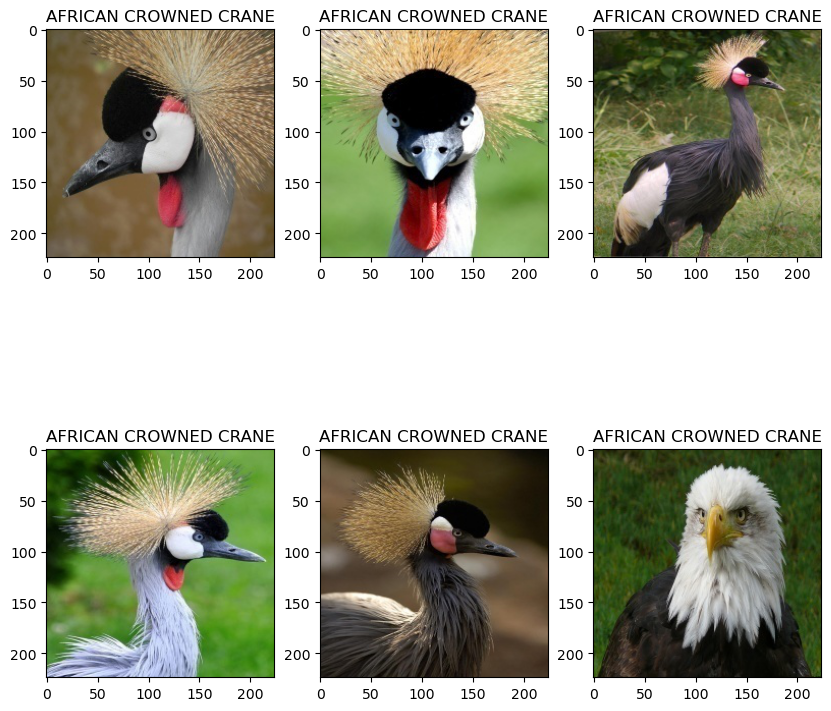

In [46]:
#Define the paths to the test and pred image folders and the model
model_path = 'model.h5'

# Load the model
model = load_model(model_path)

# Get the list of class names from the train data folder
class_names = sorted(os.listdir(train_dir))

#images to predict
pred_images=pred_images_array
val_images=val_images_array

# Make predictions
predictions = model.predict(pred_images)

# Calculate the number of rows and columns in the subplot grid
num_images = len(pred_images)
num_cols = 3
num_rows = num_images // num_cols
if num_images % num_cols != 0:
    num_rows += 1

# Create a subplot for image and display the predicted class name as the title
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    if i < num_images:
        # Show the image
        ax.imshow(pred_images[i])
        # Find the index of the highest probability
        index = np.argmax(predictions[i])
        # Get the corresponding class name
        predicted_class = class_names[index]
        # Set the title of the subplot to the predicted class name
        ax.set_title(predicted_class)
        

# Display the plot
plt.show()
